In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
adults = pd.read_csv('adult.csv',names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])
adults_test = pd.read_csv('adult.csv',names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])

In [5]:
train_data = adults.drop('label',axis=1)

test_data = adults_test.drop('label',axis=1)

data = train_data.append(test_data)

label = adults['label'].append(adults_test['label'])

In [6]:
data.head()

,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [7]:
full_dataset = adults.append(adults_test)

In [8]:
label.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: label, dtype: object

In [9]:
data_binary = pd.get_dummies(data)

data_binary.head()

,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_binary,label)

In [11]:
performance = []

In [12]:


# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()



In [13]:
# Binary data
GNB.fit(x_train,y_train)
train_score = GNB.score(x_train,y_train)
test_score = GNB.score(x_test,y_test)
print(f'Gaussian Naive Bayes : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'Gaussian Naive Bayes', 'training_score':train_score, 'testing_score':test_score})

Gaussian Naive Bayes : Training score - 0.7957453778587662 - Test score - 0.7971869049812665


In [14]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression


logClassifier = LogisticRegression()

In [15]:
logClassifier.fit(x_train,y_train)
train_score = logClassifier.score(x_train,y_train)
test_score = logClassifier.score(x_test,y_test)

print(f'LogisticRegression : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'LogisticRegression', 'training_score':train_score, 'testing_score':test_score})

LogisticRegression : Training score - 0.7971171761429946 - Test score - 0.8001965481235797


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_scores = []

KNN : Training score - 0.9999590507974857 -- Test score - 0.9342792211780603
KNN : Training score - 0.9474416985729203 -- Test score - 0.7779620416436337
KNN : Training score - 0.864642411089044 -- Test score - 0.8197285179043057
KNN : Training score - 0.8490817141336172 -- Test score - 0.7933173637982925
KNN : Training score - 0.8308593190147622 -- Test score - 0.8049874086358332
KNN : Training score - 0.8244098196187629 -- Test score - 0.8016092377618083
KNN : Training score - 0.8189840502856207 -- Test score - 0.8038818254406978
KNN : Training score - 0.8156671648819639 -- Test score - 0.8031447699772741
KNN : Training score - 0.8115312954280215 -- Test score - 0.8024077145138505
KNN : Training score - 0.8098114289224217 -- Test score - 0.8013021313187151


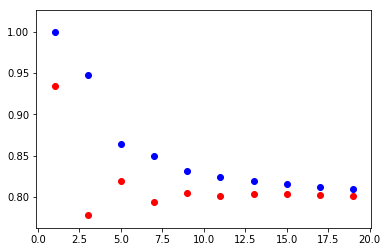

In [18]:
train_scores = []
test_scores = []

for n in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    train_score = knn.score(x_train,y_train)
    test_score = knn.score(x_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'KNN : Training score - {train_score} -- Test score - {test_score}')
    knn_scores.append({'algorithm':'KNN', 'training_score':train_score})
    
plt.scatter(x=range(1, 20, 2),y=train_scores,c='b')
plt.scatter(x=range(1, 20, 2),y=test_scores,c='r')

plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

knn.score(x_train,y_train)

train_score = knn.score(x_train,y_train)
test_score = knn.score(x_test,y_test)

print(f'K Neighbors : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'K Neighbors', 'training_score':train_score, 'testing_score':test_score})

K Neighbors : Training score - 0.864642411089044 - Test score - 0.8197285179043057


In [20]:
performance

[{'algorithm': 'Gaussian Naive Bayes',
  'training_score': 0.7957453778587662,
  'testing_score': 0.7971869049812665},
 {'algorithm': 'LogisticRegression',
  'training_score': 0.7971171761429946,
  'testing_score': 0.8001965481235797},
 {'algorithm': 'K Neighbors',
  'training_score': 0.864642411089044,
  'testing_score': 0.8197285179043057}]

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rndTree = RandomForestClassifier()

In [23]:
rndTree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
rndTree.score(x_test,y_test)

0.9505558626619987

In [25]:
rndTree.score(x_train,y_train)

0.9961712495649148

In [26]:
train_score = rndTree.score(x_train,y_train)
test_score = rndTree.score(x_test,y_test)

print(f'Random Forests : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'Random Forests', 'training_score':train_score, 'testing_score':test_score})

Random Forests : Training score - 0.9961712495649148 - Test score - 0.9505558626619987


In [27]:
from sklearn import svm

svc = svm.SVC(kernel='linear')


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data_binary,label)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
x_train_scaled = scaler.transform(x_train)

In [29]:
x_test_scaled = scaler.transform(x_test)

In [30]:
svc.fit(x_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
svc.score(x_test_scaled,y_test)

0.8530802776242246

In [ ]:
#problem 1: Prediction task is to determine whether a person makes over 50K a year.
#the prediction with different algorithms is done above.

#problem 2: which factors are important?
#Age
#fnlwgt
#education_num
#capital_gain
#capital_loss
#hours_per_week
#work_class

#problem 3: Which algorithms are best for this dataset?
#randomn tree classifier algorithm works fine with this dataset with highest accuracy score